#Logistic Regression: Multiclass Classification


In [2]:
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_digits


In [4]:
digits = load_digits()

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

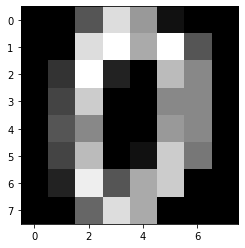

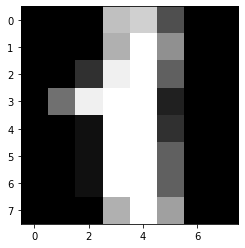

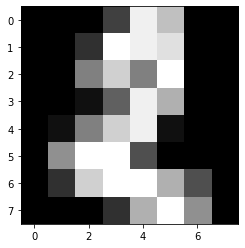

In [6]:
plt.gray()
for i in range(3):
  plt.imshow(digits.images[i])
  plt.show()

#Whats the contain in this dataset , here we can see.

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

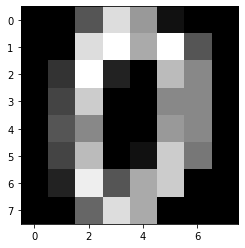

In [8]:
plt.imshow(digits.images[0])
plt.show()

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test= train_test_split(digits.data,digits.target,test_size=0.2)

In [12]:
len(x_train)

1437

In [13]:
len(x_test)

360

In [14]:
from sklearn.linear_model import LogisticRegression



In [15]:
Model = LogisticRegression()

In [16]:
Model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:806: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(


LogisticRegression()

In [17]:
Model.score(x_test,y_test)

0.9611111111111111

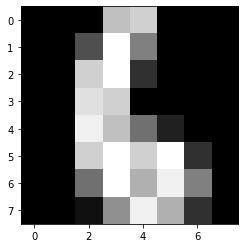

In [18]:
plt.imshow(digits.images[6])

In [19]:
digits.target[6]

6

In [20]:
Model.predict([digits.data[67]])

array([6])

In [21]:
predicted = Model.predict(x_test)

In [22]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

<Figure size 432x432 with 0 Axes>

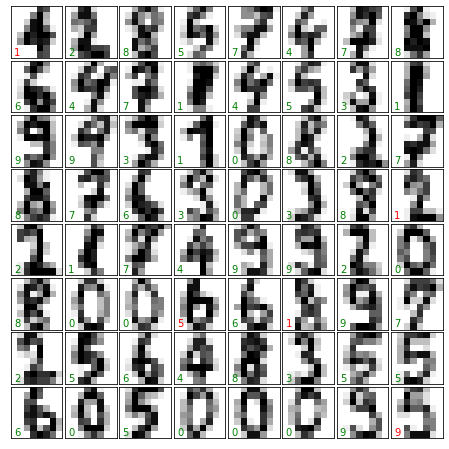

In [23]:
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

#Confusion Matrix

In [24]:
y_predicted= Model.predict(x_test)

In [25]:
from  sklearn.metrics import confusion_matrix

In [26]:
cm= confusion_matrix(y_test,y_predicted)

In [27]:
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  1, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]])

#Visualize from Seabron

Text(69.0, 0.5, 'Truth')

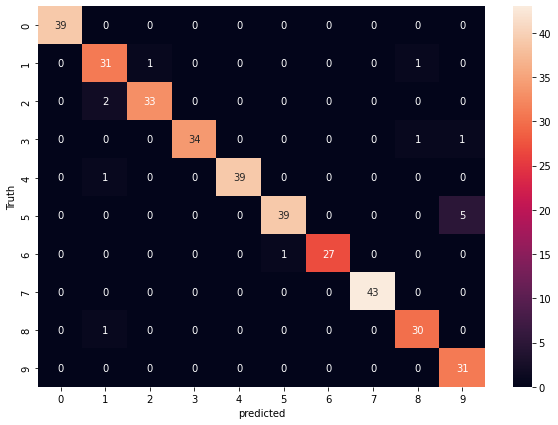

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
